# SASCA Tutorial

In the following, we will describe how to run a SASCA by using Stella. As an overview, this tutorial is composed in a few steps
* Generate a file that describes the implementation to attack.
* Generate traces 
* Compute SNR on all the variables to profile within the graph and build the model
* Generate the appropriate factor graph to run the attack
* Perform belief propagation on the graph to generate the attack

In this tutorial, we will mount a factor graph on a unprotected AES in a D&C fashion. We will do known and unknown plaintext attacks. For the tutorial to be short, all the function specific to this cases are stored in this directory but not in the notebook. (default path for simulated traces storage are also given there). 

## Step 1: Writing a graph file
In order to describe the factor graph, we rely on a .txt file which is parsed by Stella. The file is formatted in the following way for our D&C AES attack:

```
k0 #secret

#indeploop

p0 #public
x0 #profile
x0 = k0 ^ p0

#endindeploop

```
In this example, the variables (k0,p0,x0) can take 3 flags:
* secret: means that this is a variable that the adversary wants to known the distribution of. After the attack, he will get such a think.
* public: this is a public variable which is so known to the adversary. During the attack, that variable value has to be given to Stella.
* profile: is a variable that will be profiled by Stella (it will esptimate a pdf for it). During the attack, a probability table has to be given to Stella.

the indeploop tag must contain the encryption loop. The number of interation of the loop can be chosen later on from the Python interface.

In order to generate such a file, [gen_file.py](gen_file.py) contains such a function. We import it and generate the file.



In [22]:
from gen_file import write_file
file_name = "my_example.txt"

write_file(file_name=file_name,
          keyflag="secret",
          ptflag="profile",
          indepk=False,
          nbytes=2)

In order to visualize the factor graph, you can ask Stella to parse the file and generate the graph.

You can then change the flags in the file, the number of iteration and enjoy the vizualisation.

Loop generation: 100%|██████████| 10/10 [00:00<00:00, 5746.41it/s]


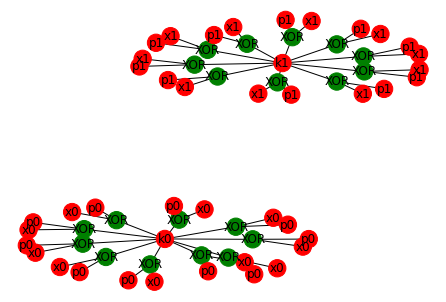

In [24]:
from stella.attacks.sasca.scripts.graph_parsing import build_graph_from_file
import matplotlib.pyplot as plt

graph = build_graph_from_file(file_name,Nk=256,public=None,it=10)
graph.plot()
